## introduction to opencv with python


based on 
https://www.geeksforgeeks.org/introduction-to-opencv/




## Loading images

Let’s start with the simple task of reading an image using OpenCV.

In [ ]:
# Importing the OpenCV library
import cv2 as cv
import numpy as np

# Importing the matplotlib library to show the images
from matplotlib import pyplot as plt # w use plt in rather than pyplot 

# Reading the image using imread() function
img = cv.imread('cofee.jpg')
  
# Extracting the height and width of an image
h, w = img.shape[:2]
# Displaying the height and width
print("Height = {},  Width = {}".format(h, w))


Error: Session cannot generate requests

## Lets show the image using opencv imshow

opencv's imshow opens the image in a separate window ! 


In [5]:

cv.imshow("Image",img)
cv.waitKey(0) # waits until you press a key and closes the window.
cv.destroyAllWindows()


## Show an image in the notebook using matplotlib imshow


In [1]:
plt.imshow(img)
plt.show()

NameError: name 'plt' is not defined

## OpenCv stores images in BGR order.
opencv stores the image in BGR order, and matplotlib expectes them in RGB
to fix this we need to swap the chanales when we need to show the image.


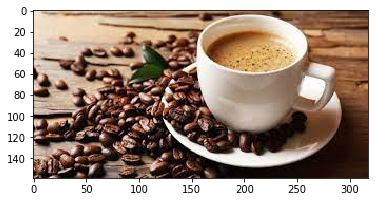

In [4]:
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


## we can define a function to show opencv images in notbooks


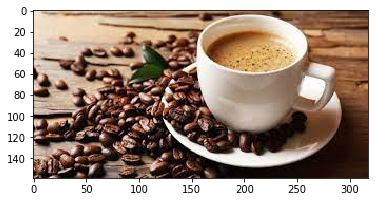

In [5]:

def cv_show(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

cv_show(img)
    # you can put this in a function


## What is the type of the variable img ?



In [6]:
print(type(img))


<class 'numpy.ndarray'>


## what is  img.shape ?

In [7]:
print(img.shape)

(159, 318, 3)


## python slicing is used to extract the w and h

* sample is a property of the numpy array 
* it is of type tuple
* tuple is a built-in type in python 
* python tuples and python lists can be sliced.



In [8]:


print(img.shape)
print(img.shape[:3])
print(img.shape[:2])
print(img.shape[:1])
print(img.shape[2:3])

(159, 318, 3)
(159, 318, 3)
(159, 318)
(159,)
(3,)


## Extracting the RGB values of a pixel

Now we will focus on extracting the RGB values of an individual pixel.

Note – OpenCV arranges the channels in BGR order. 

So the 0th value will correspond to Blue pixel and not Red.

In [9]:
# Extracting RGB values. 
# Here we have randomly chosen a pixel
# by passing in 100, 100 for height and width.
(B, G, R) = img[100, 100]
  
# Displaying the pixel values
print("R = {}, G = {}, B = {}".format(R, G, B))
  
# We can also pass the channel to extract 
# the value for a specific channel
B = img[100, 100, 0]
print("B = {}".format(B))



R = 109, G = 71, B = 50
B = 50


## Extracting the Region of Interest (ROI) (croping)
this can be done with numpy slicing


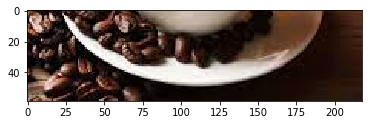

In [10]:
# We will calculate the region of interest 
# by slicing the pixels of the image
roi = img[100 : 400, 100 : 500]
cv_show(roi)

## Resizing the Image


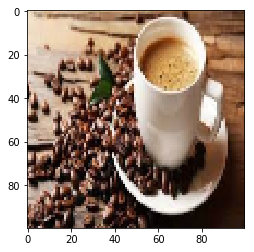

In [11]:
resized = cv2.resize(img, (100, 100))
cv_show(resized)

## Resizing an image while prezerving the aspect ratio

$\frac{h_1}{w_1}=\frac{h_2}{w_2}$

if you have $w_2$ you can compute $h_2$ like this $h_2=w_2\frac{h_1}{w_1}$


ratio :  0.5
250
ratio 2 :  0.5
old dimentions (318, 159)
new dimentions (500, 250)


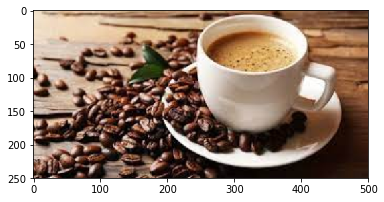

In [12]:
# Calculating the ratio
ratio =  h/w
print('ratio : ',ratio)

w2=500
h2=int(ratio*w2)
print(h2)
ratio2 = h2/w2

print('ratio 2 : ',ratio2)
 
# Creating a tuple containing width and height
dim = (w2, h2)

print('old dimentions',(w,h))
print('new dimentions',dim)
# Resizing the image
resize_aspect = cv2.resize(img, dim)
cv_show(resize_aspect)

# Scaling
we can write a function that rescales an image by a factor


(159, 79)


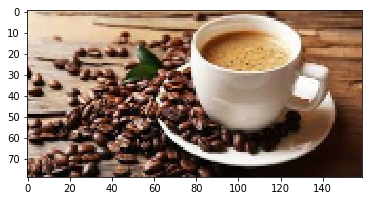

In [20]:
def scale_image(image,factor):
    w,h,_=image.shape
    new_dim=(int(h*factor),int(w*factor))
    return cv2.resize(image,new_dim)

scale = .5

cv_show(scale_image(img,scale))

## Drawing a rectangle in an image 


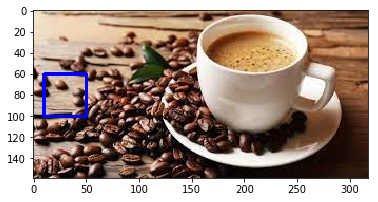

In [22]:
# We are copying the original image, 
# as it is an in-place operation.
img_copy = img.copy()
  
# Using the rectangle() function to create a rectangle.
rectangle = cv2.rectangle(img_copy, (10, 60), 
                          (50, 100), (255, 0, 0), 2)

cv_show(img_copy)


## Creating a blanc image and drawing on it

## Color plans 
we can get one of the three color plans using numpy slicing

In [ ]:
img_blue =img_copy[:,:,0]
plt.imshow(img_blue)
plt.show()

## Arithmitic operations on images